# Prueba no paramétrica: Mann–Whitney U (mwu)

- Alternativa no paramétrica al **t-test independiente** (dos grupos, muestras **no apareadas**).
- Compara **distribuciones** (o medianas si las formas son similares) entre dos grupos.
- Hipótesis nula H₀: las muestras provienen de la **misma** distribución.


In [1]:
def import_csv(file):
    import pandas as pd
    return pd.read_csv(file)

path = "../data/Terminos_lagoon_TA_DIC_2023_RawData.csv"
co2_data = import_csv(path)

co2_data.head()


,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
0,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0
1,CDL01F,5/3/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,4.90,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN
2,CDL02S,5/3/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,6.99,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0
3,CDL02F,5/3/2020,Candelaria,River,CDL02,Bottom,Dry,2.23,24847.4,1.261,...,6.52,13.87,23074.0,13.44,29.024,18.61005,-91.24403,3667,3992,3992.0
4,CDL03S,5/3/2020,Candelaria,River,CDL03,Surface,Dry,0.58,46341.6,0.465,...,6.24,28.06,43670.8,3.60,28.202,18.63166,-91.29359,2928,3023,3023.0


In [2]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(data1, data2, alpha=0.05, label=""):
    """Corre Mann–Whitney U de dos colas y muestra U y p-valor."""
    # eliminar NaNs por seguridad
    d1 = data1.dropna()
    d2 = data2.dropna()
    res = mannwhitneyu(d1, d2, alternative="two-sided")
    print(f"[{label}] U = {res.statistic:.3f}, p = {res.pvalue:.6f}  (n1={len(d1)}, n2={len(d2)})")
    if res.pvalue < alpha:
        print("→ Diferencia **significativa** (rechazamos H₀)")
    else:
        print("→ Diferencia **no** significativa (no rechazamos H₀)")


## TA por temporada (boxplot) y prueba Mann–Whitney (Dry vs Rainy)


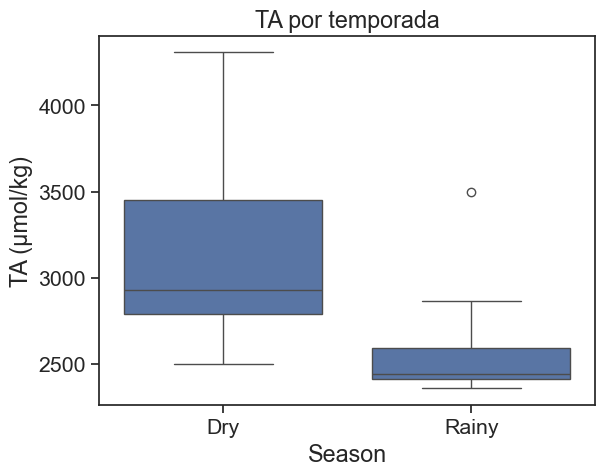

[TA Dry vs Rainy] U = 2251.500, p = 0.000000  (n1=72, n2=34)
→ Diferencia **significativa** (rechazamos H₀)


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", font_scale=1.4)

# Boxplot TA por season
ax = sns.boxplot(x="season", y="ta_micromol_kg", data=co2_data)
plt.xlabel("Season"); plt.ylabel("TA (μmol/kg)")
plt.title("TA por temporada")
sns.despine(top=False, right=False)
plt.show()

# Filtrar grupos
ta_dry   = co2_data.loc[co2_data["season"] == "Dry",   "ta_micromol_kg"]
ta_rainy = co2_data.loc[co2_data["season"] == "Rainy", "ta_micromol_kg"]

# Mann–Whitney
mann_whitney_test(ta_dry, ta_rainy, label="TA Dry vs Rainy")


## Salinidad por temporada (boxplot + swarm) y Mann–Whitney


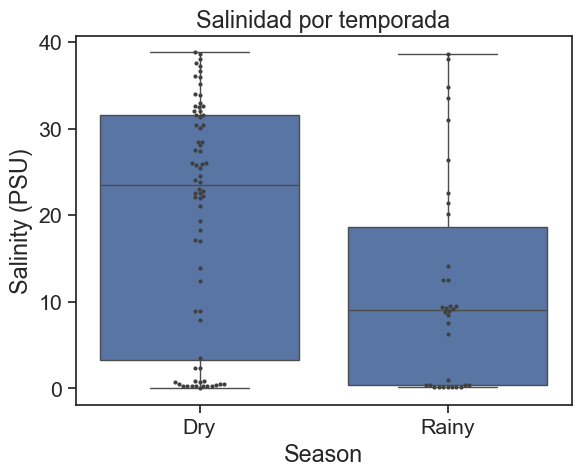

[Salinity Dry vs Rainy] U = 1660.000, p = 0.003200  (n1=72, n2=34)
→ Diferencia **significativa** (rechazamos H₀)


In [4]:
# Boxplot + swarm de salinidad
ax = sns.boxplot(x="season", y="sal_psu", data=co2_data)
sns.swarmplot(x="season", y="sal_psu", data=co2_data, color=".25", size=3)
plt.xlabel("Season"); plt.ylabel("Salinity (PSU)")
plt.title("Salinidad por temporada")
sns.despine(top=False, right=False)
plt.show()

# Filtrar y probar
sal_dry   = co2_data.loc[co2_data["season"] == "Dry",   "sal_psu"]
sal_rainy = co2_data.loc[co2_data["season"] == "Rainy", "sal_psu"]

mann_whitney_test(sal_dry, sal_rainy, label="Salinity Dry vs Rainy")


## Salinidad por temporada (violín)


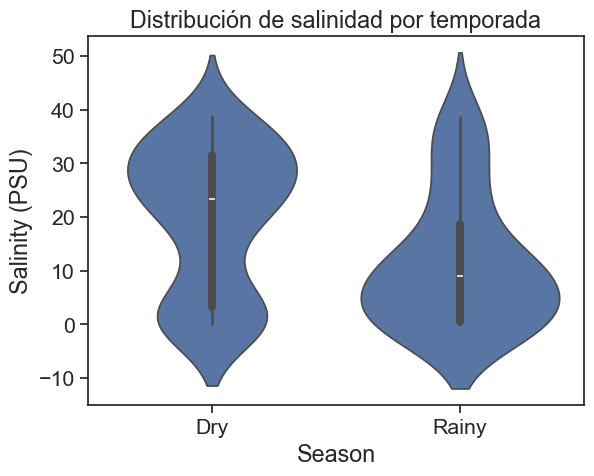

In [5]:
ax = sns.violinplot(x="season", y="sal_psu", data=co2_data, inner="box")
plt.title("Distribución de salinidad por temporada")
plt.xlabel("Season"); plt.ylabel("Salinity (PSU)")
sns.despine(top=False, right=False)
plt.show()


# Ejercicio
**Evaluar Mann–Whitney U para DIC y Temperatura.**  
- Graficar boxplots y violines Dry vs Rainy.  
- Ejecutar la prueba y comentar si hay diferencia significativa.


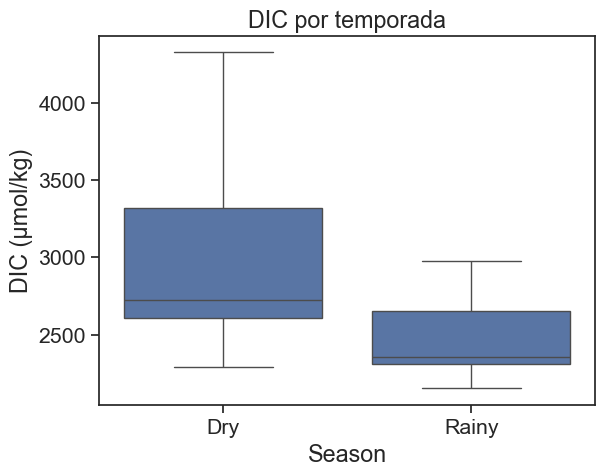

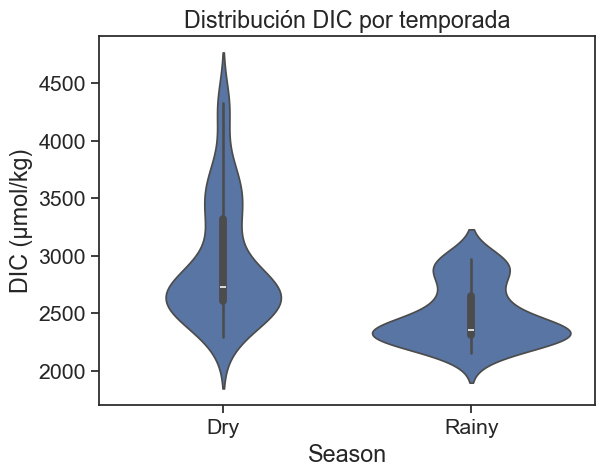

[DIC Dry vs Rainy] U = 1942.500, p = 0.000001  (n1=72, n2=34)
→ Diferencia **significativa** (rechazamos H₀)


In [7]:
# DIC
ax = sns.boxplot(x="season", y="dic_micromol_kg", data=co2_data)
plt.xlabel("Season"); plt.ylabel("DIC (μmol/kg)")
plt.title("DIC por temporada")
sns.despine(top=False, right=False)
plt.show()

ax = sns.violinplot(x="season", y="dic_micromol_kg", data=co2_data, inner="box")
plt.xlabel("Season"); plt.ylabel("DIC (μmol/kg)")
plt.title("Distribución DIC por temporada")
sns.despine(top=False, right=False)
plt.show()

dic_dry   = co2_data.loc[co2_data["season"] == "Dry",   "dic_micromol_kg"]
dic_rainy = co2_data.loc[co2_data["season"] == "Rainy", "dic_micromol_kg"]
mann_whitney_test(dic_dry, dic_rainy, label="DIC Dry vs Rainy")


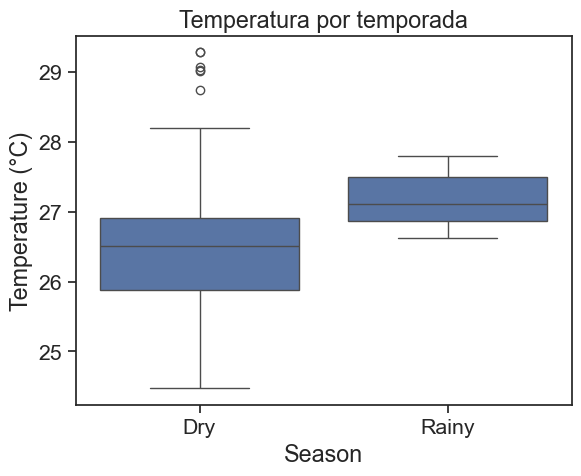

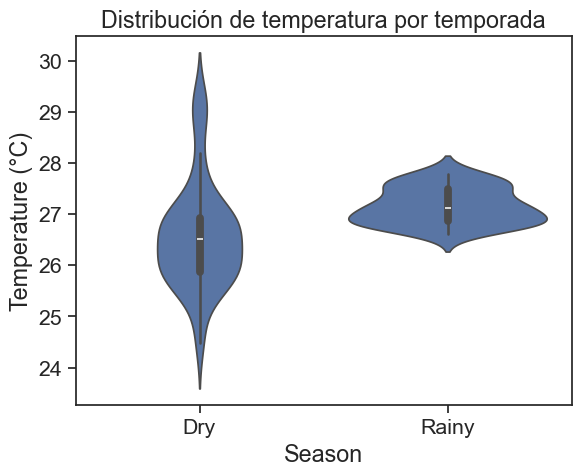

[Temp Dry vs Rainy] U = 551.000, p = 0.000005  (n1=72, n2=34)
→ Diferencia **significativa** (rechazamos H₀)


In [8]:
# Temperatura (si existe columna temp_c)
if "temp_c" in co2_data.columns:
    ax = sns.boxplot(x="season", y="temp_c", data=co2_data)
    plt.xlabel("Season"); plt.ylabel("Temperature (°C)")
    plt.title("Temperatura por temporada")
    sns.despine(top=False, right=False)
    plt.show()

    ax = sns.violinplot(x="season", y="temp_c", data=co2_data, inner="box")
    plt.xlabel("Season"); plt.ylabel("Temperature (°C)")
    plt.title("Distribución de temperatura por temporada")
    sns.despine(top=False, right=False)
    plt.show()

    temp_dry   = co2_data.loc[co2_data["season"] == "Dry",   "temp_c"]
    temp_rainy = co2_data.loc[co2_data["season"] == "Rainy", "temp_c"]
    mann_whitney_test(temp_dry, temp_rainy, label="Temp Dry vs Rainy")
else:
    print("No existe la columna 'temp_c' en el dataset.")
